# Portfolio assignment week 5
#### Author: Karina Diaz

## 1. SVC

The Scikit-learn library provides different kernels for the Support Vector Classifier, e.g. `RBF` or `polynomial`.

Based on the examples [in the accompanying notebook](https://github.com/fenna/BFVM23DATASCNC5/blob/main/Exercises/E_LR_SVM.ipynb), create your own `SVC` class and configure it with different kernels to see if you are able to have it correctly separate the moon-dataset. You can also use a `precomputed` kernel. In addition, there are several parameters you can tune to for better results. Make sure to go through [the documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html).

**Hint**:

- Plot the support vectors for understanding how it works.
- Give arguments why a certain kernel behaves a certain way.

In [47]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.datasets import make_moons
from sklearn.svm import SVC


#### Creating non-linear dataset

In [48]:
# Create the dataset
X, y = make_moons(n_samples=200, random_state=0, shuffle=True)
X_train, X_test = X[:100], X[100:]
y_train, y_test = y[:100], y[100:]


In [49]:
# Inspectioning the dataset
print(X.shape)
print(X.min(), X.max())

print(y.shape)
print(np.unique(y, return_counts=True))


(200, 2)
-1.0 2.0
(200,)
(array([0, 1]), array([100, 100]))


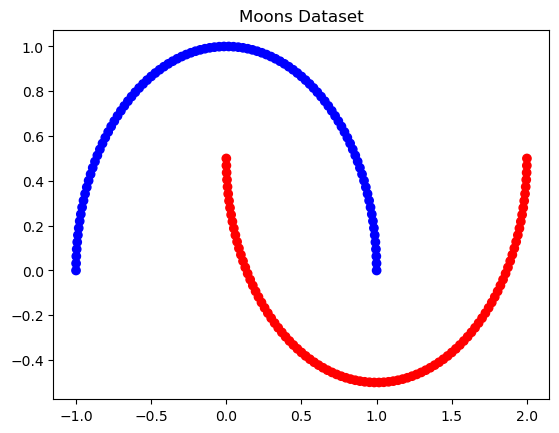

In [50]:
# Plot the dataset to see how it looks
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr')
plt.title('Moons Dataset')
plt.show()

#### Defining functions needed for the analyses

In [51]:
# Creating function for the contour
def make_meshgrid(X, h=0.01):
    """
    Create a mesh grid based on vectors X and Y.
    Function obtained from: 
    https://github.com/fenna/BFVM23DATASCNC5/blob/main/Exercises/E_LR_SVM.ipynb
    """
    if X.shape[1] > 2:
        raise ValueError(
            'Requires a matrix of 2 features for visualization purposes.'
            ) 
    x_min = X.min() - 1
    x_max = X.max() + 1       
    x = np.arange(x_min, x_max, h)
    xx, yy = np.meshgrid(x, x)
    return xx, yy

In [52]:
# Creating function to plot the results
def plotting(xx, yy, prediction, title, support_vectors):
    '''
    Function to plot the predictions and the support vectors from the model
    Code inspired and modifed from: 
    https://github.com/fenna/BFVM23DATASCNC5/blob/main/Exercises/E_LR_SVM.ipynb
    '''
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 5), layout="constrained")
    fig.suptitle('Decision boundary of linear algorithms')

    # Plotting de data points
    contour = axes.contourf(xx, yy, prediction, 25, cmap=plt.cm.coolwarm)
    ax_c = fig.colorbar(contour)
    ax_c.set_label('$P(y = 1)$')
    ax_c.set_ticks([0, .25, .5, .75, 1])
    axes.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolor='white', 
                linewidth=1, s=50, cmap=plt.cm.coolwarm)

    # Plotting the support vectors
    axes.scatter(support_vectors[:, 0], support_vectors[:, 1], facecolors='none', 
                edgecolors='black', label='Support Vectors')
    
    axes.set(aspect='equal',
            xlim=(X.min() - 1, X.max() + 1),
            ylim=(X.min() - 1, X.max() + 1),
            xlabel='$X_1$',
            ylabel='$X_2$')
    axes.set_title(title)
    axes.legend()
    plt.show()

#### Tuning parameters and plotting the results

In [53]:
xx, yy = make_meshgrid(X)
grid = np.c_[xx.ravel(), yy.ravel()]

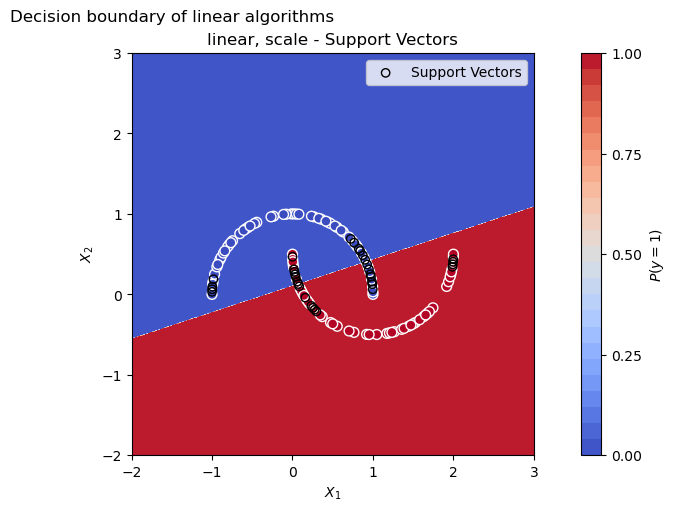

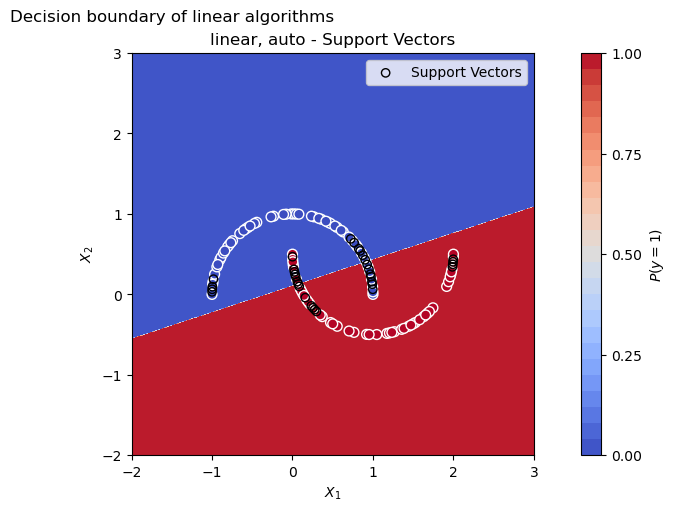

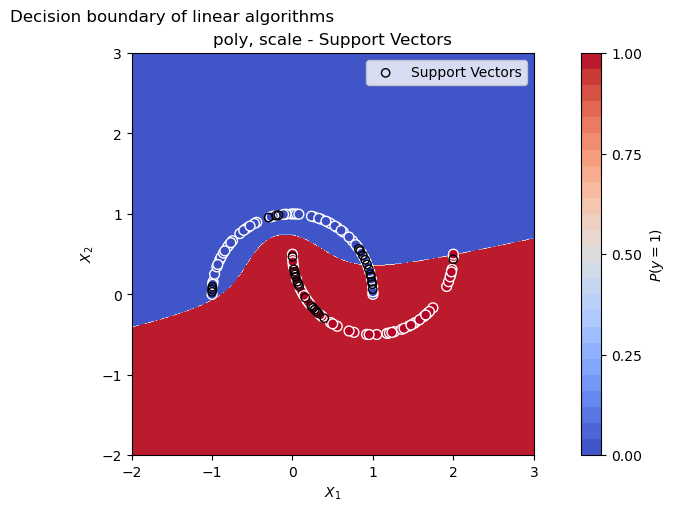

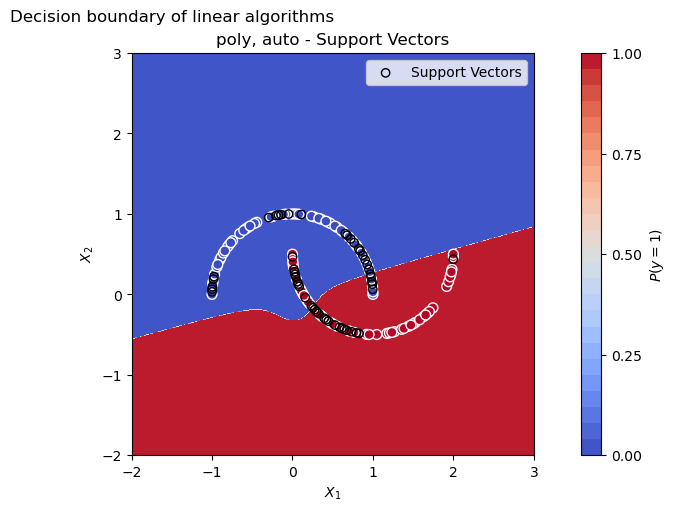

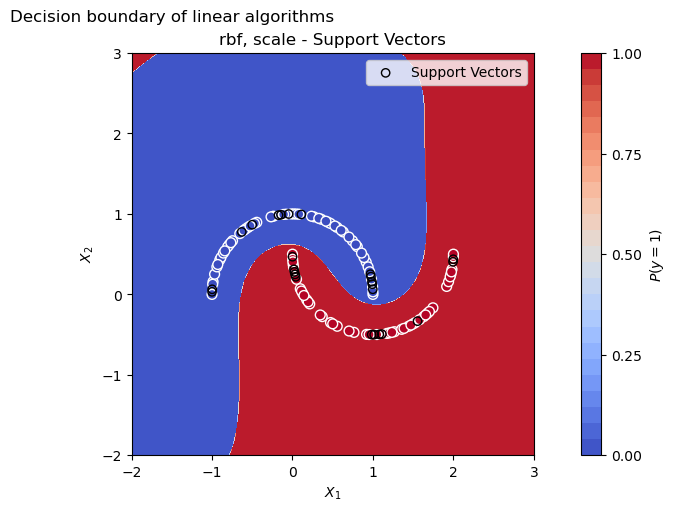

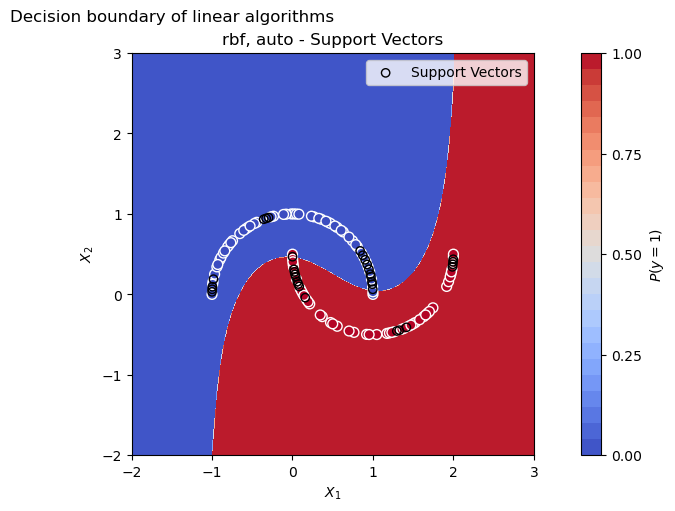

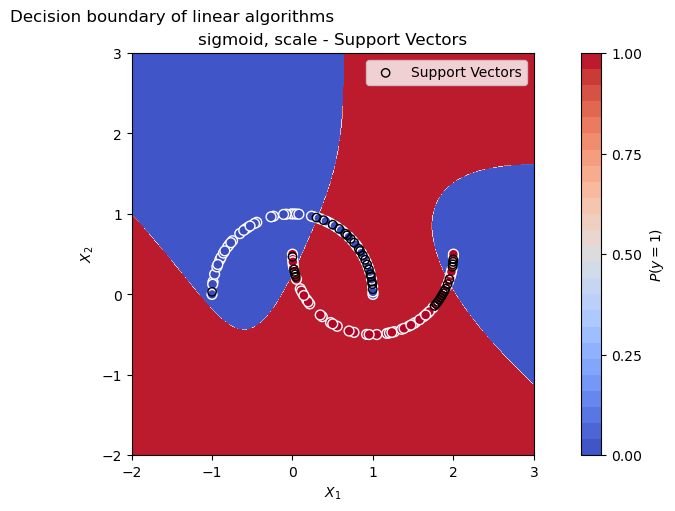

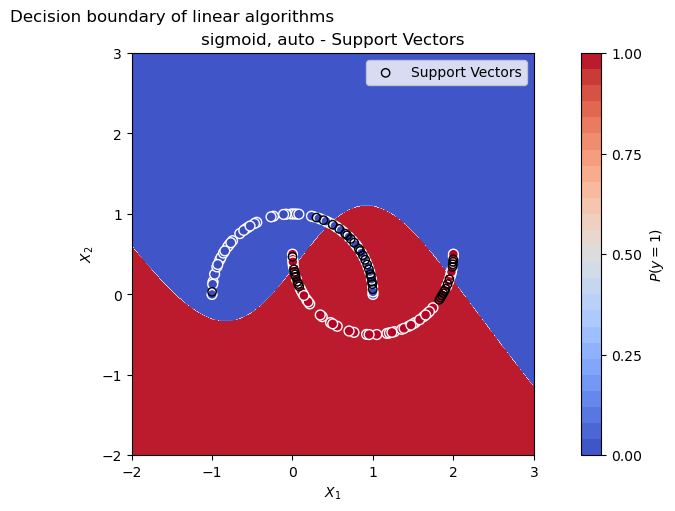

In [54]:
## Changing kernels and gamma variable
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
gammas =  ['scale', 'auto']

for kernel in kernels: 
    for gamma in gammas:
                    
        #Setting up the model 
        clf = SVC(kernel=kernel, gamma=gamma)
        clf.fit(X_train, y_train)
    
        # Get support vectors
        support_vectors = clf.support_vectors_

        # Get the predictions
        clf_prob= clf.predict(grid).reshape(xx.shape)

        # Plotting the predictions and supporting vectors
        plotting(xx=xx,yy=yy, prediction=clf_prob, title=f'{kernel}, {gamma} - Support Vectors', 
                support_vectors=support_vectors)

### Analysing the results
As we can see the moons dataset is classified by the SVM model. 
   
The support vectors help define the soft margings and the thresholds to classify the data. Some models look better than the others.
  
I decided to tune the *kernel* and *gamma* parameters.  

- **Kernel**: this parameter transforms the input data in a 'linear', 'polynomial', 'rfb' or 'sigmoid way'. **'Polynomial'** and **'RBF'** are useful for **non-linear hyperplane**. As we can see in the plots of the models evaluated above *these two kernels are the ones that classified better the **non-linear moon datasets created**.* 


- **Gamma**: defines how much influence a single training example has. The larger gamma is, the closer other examples must be to be affected. Gamma is a regularization hyperparameter:
    * Lower value of Gamma - loosely fit the training dataset.
    * Higher value of gamma - exactly fit the training dataset (may cause over-fitting, so it has to be reduced).

    Gamma 'auto' uses (1 / n_features) and gamma 'scale' is like auto, but takes into account the variability of the data. This parameter only works in ‘rbf’, ‘poly’ and ‘sigmoid’ kernels. *Based on the plots shown above the moons dataset is better classified with the **scale gamma value**.*




Another parameter that can be tuned is de **polynomial degree** for the Kernel *'poly'*. So I also check how this parameter changes the classification of the moons data. 
 

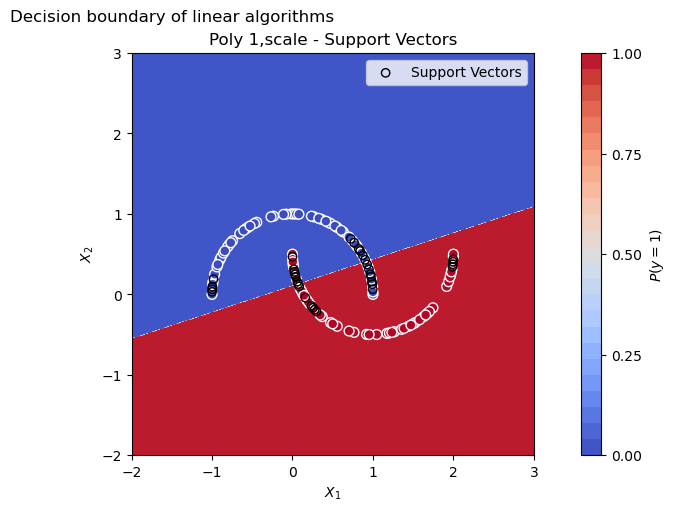

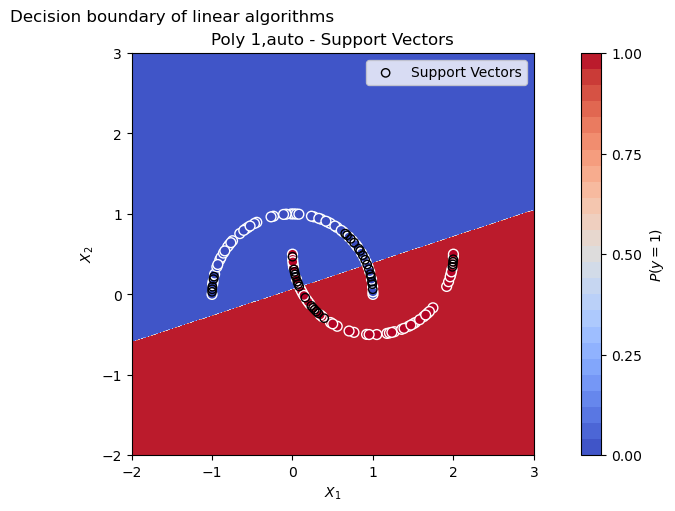

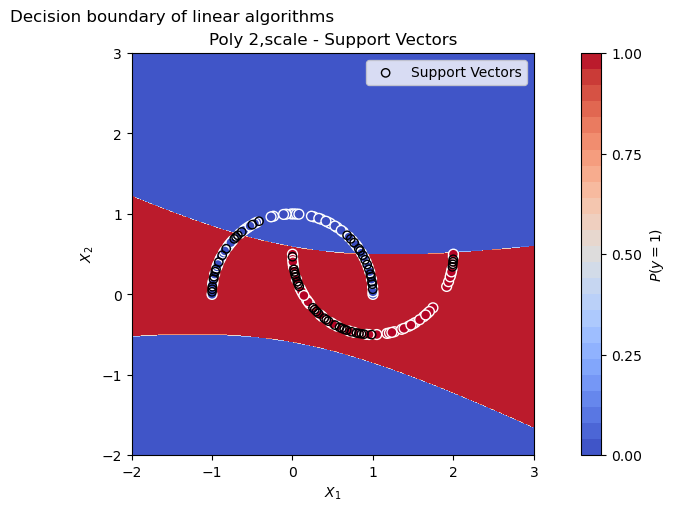

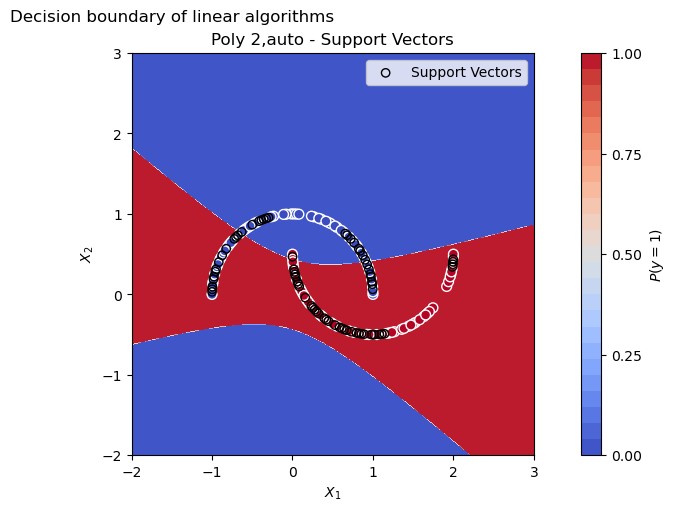

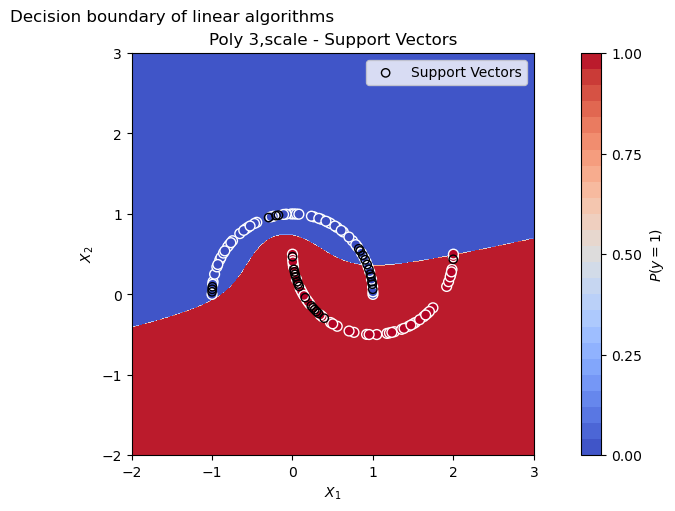

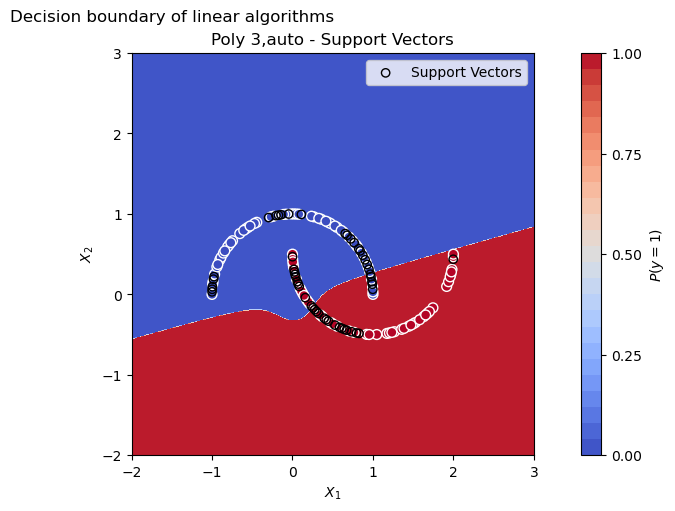

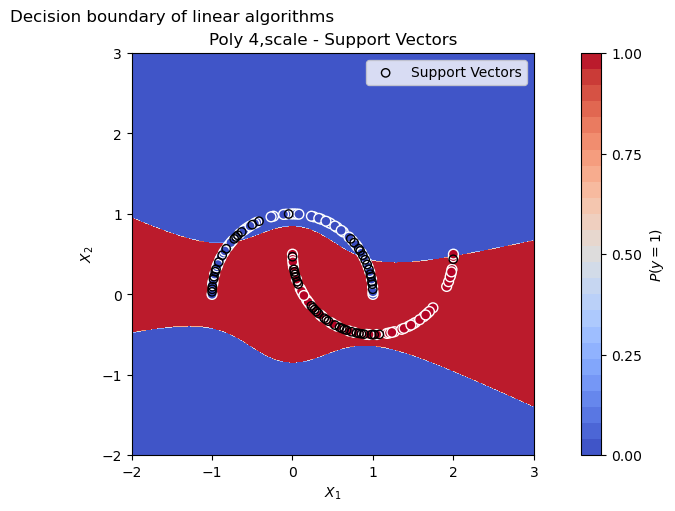

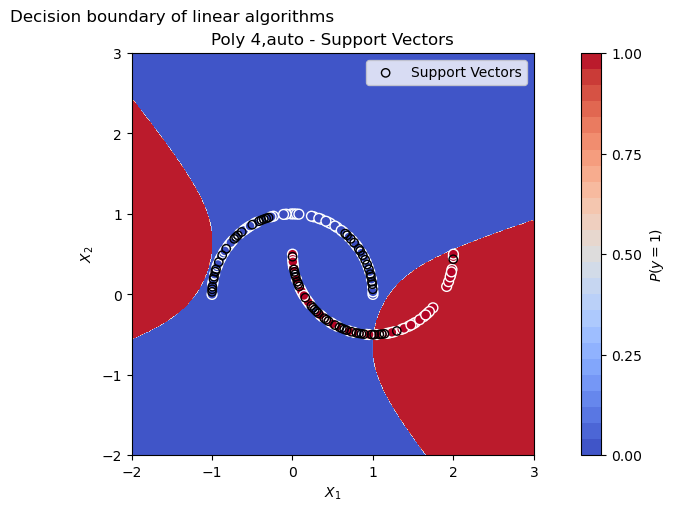

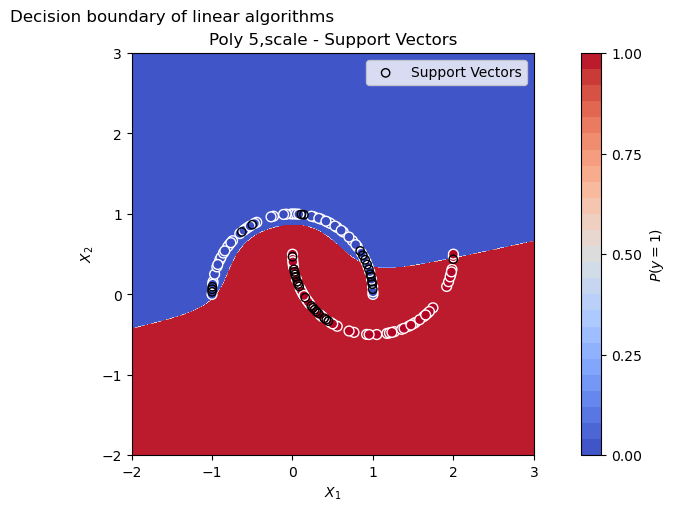

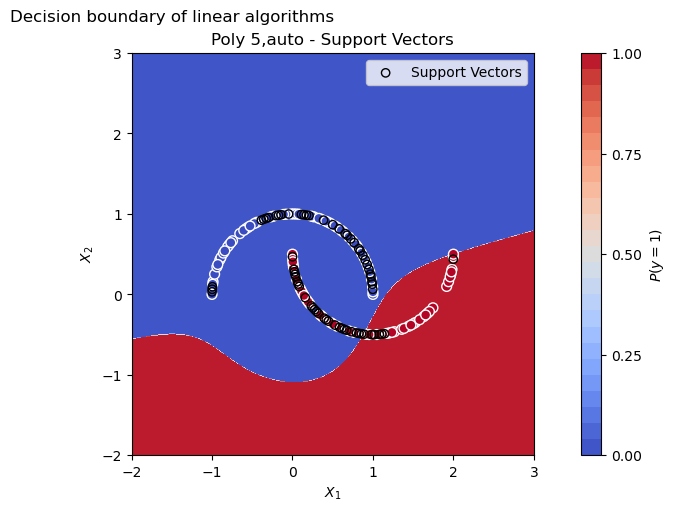

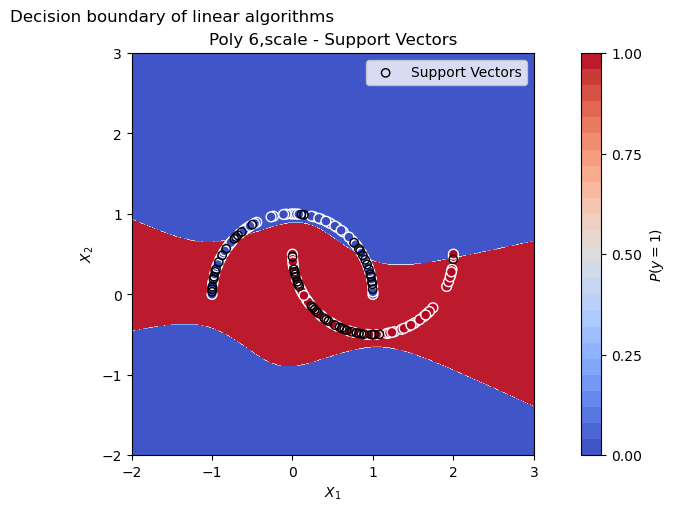

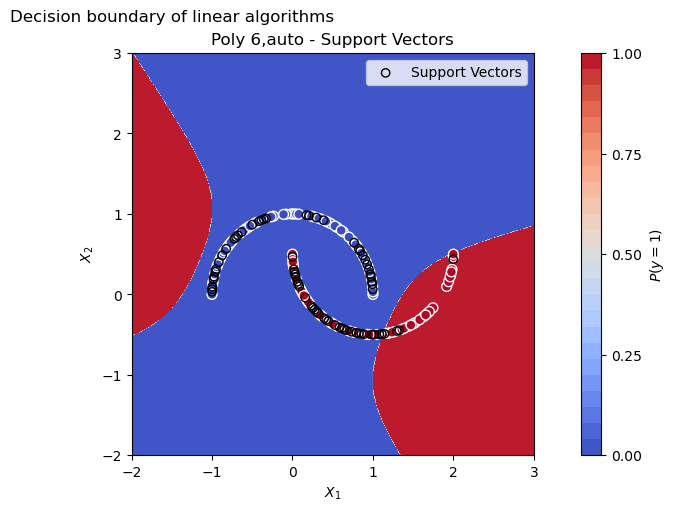

In [55]:
# Analysing just Poly kernel and tuning degree parameter
degrees = [1, 2, 3, 4, 5, 6]
gammas =  ['scale', 'auto']

for degree in degrees:
    for gamma in gammas:
        #Setting up the model 
        clf = SVC(kernel='poly',degree=degree, gamma=gamma)
        clf.fit(X_train, y_train)
    
        # Get support vectors
        support_vectors = clf.support_vectors_

        # Get the predictions
        clf_prob= clf.predict(grid).reshape(xx.shape)

        plotting(xx=xx,yy=yy, prediction=clf_prob, title=f'Poly {degree},{gamma} - Support Vectors', 
                support_vectors=support_vectors)

### Analysing the results

* **Degree:** 
    Degree of the polynomial kernel function (‘poly’). Must be non-negative.

The **poly 3rd and 5th degree polynomial** with **scale gamma are the best models for this dataset**. As almost all the points are correctly classified and the missclassifications are the least. 

In this case I plotted several parameters as well as the related plots with the support vectors. I did it this way for illustrative purposes and to understand and compare how the classification models were affected.  
    
The best way to tune the parameters could be perfoming a grid search. Additionally, If we want to know which model perfom better an evalution method is needed.


### References
* Supervised machine learning presentations (MDSLS) (2023):
    * *'Presentation 4 about SVM.pdf'*
* https://www.datacamp.com/tutorial/svm-classification-scikit-learn-python
* https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC

* *GeÌ ron, A. (2019). Hands-on machine learning with Scikit-Learn, Keras and TensorFlow: concepts, tools, and techniques to build intelligent systems (2nd ed.). O'Reilly.*



## 2. Model Evaluation

Classification metrics are important for measuring the performance of your model. Scikit-learn provides several options such as the `classification_report` and `confusion_matrix` functions. Another helpful option is the `AUC ROC` and `precision-recall curve`. Try to understand what these metrics mean and give arguments why one metric would be more important then others.

For instance, if you have to predict whether a patient has cancer or not, the number of false negatives is probably more important than the number of false positives. This would be different if we were predicting whether a picture contains a cat or a dog – or not: it all depends on the context. Thus, it is important to understand when to use which metric.

For this exercise, you can use your own dataset if that is eligable for supervised classification. Otherwise, you can use the [breast cancer dataset](https://www.kaggle.com/datasets/yasserh/breast-cancer-dataset) which you can find on assemblix2019 (`/data/datasets/DS3/`). Go through the data science pipeline as you've done before:

1. Try to understand the dataset globally.
2. Load the data.
3. Exploratory analysis
4. Preprocess data (skewness, normality, etc.)
5. Modeling (cross-validation and training)
6. **Evaluation**

Create and train several `LogisticRegression` and `SVM` models with different values for their hyperparameters. Make use of the model evaluation techniques that have been described during the plenary part to determine the best model for this dataset. Accompany you elaborations with a conclusion, in which you explicitely interpret these evaluation and describe why the different metrics you are using are important or not. Make sure you take the context of this dataset into account.


In [56]:
# Libraries needed

# Loafing and preprocessing the data
import yaml
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import normaltest
from sklearn.model_selection import train_test_split

# Creating a pipeline and performing gridsearch
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

# Sklearn models
from sklearn.svm import SVC
from sklearn.svm import NuSVC
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression

# Model evaluation
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import auc, roc_curve, RocCurveDisplay
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import precision_recall_curve, average_precision_score



### Loading the data

In [57]:
# Defining a function to get the config file
def get_config():
    '''Setting the config file'''
    with open("config_DS3.yaml", 'r') as stream:
        config = yaml.safe_load(stream)
    return config


In [58]:
config = get_config()
cancer_path = (config['breast_cancer'])
cancer_path

# Creating a data frame with the data
cancer_df = pd.read_csv(cancer_path)
cancer_df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Exploratory analysis

#### Highlights 

* The data consist of **569 observations** and **32** columns or **features**.
* Samples:  
     - **[B]enign**: 357  
     - **[M]alignat**: 212
* The data types are correct.
* A non informative column is dropped.
* There is no missing data.
* `diagnosis` was converted into numercical values for a better classification. **M == 1**,  **B == 0**
* The raw data is not normalised

In [59]:
print('Data shape: ', cancer_df.shape)
print(cancer_df.info())


Data shape:  (569, 32)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  per

In [60]:
cancer_df.head(3)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [61]:
# Checking how the data is divided
print(cancer_df['diagnosis'].value_counts())

B    357
M    212
Name: diagnosis, dtype: int64


In [62]:
# drop the not needed column, in this case is the Id one 
cancer_df.drop('id', axis=1, inplace = True)

In [63]:
# convert the diagnosis columns into numerical values rather than strings
# convert the M (malignat) to 1 and B (benign) to 0
cancer_df.replace({'M': 1, 'B': 0}, inplace=True)
print(cancer_df['diagnosis'].value_counts())


0    357
1    212
Name: diagnosis, dtype: int64


In [64]:
#check for missing data
missing = cancer_df.isnull().sum()
print('-> Missing data in:', missing[missing > 0])
# There is no missing data
print('-'*50)

# Check which columns are present on the dataframe
print('Features:', cancer_df.columns)

-> Missing data in: Series([], dtype: int64)
--------------------------------------------------
Features: Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


### Preprocess data

In [65]:
# Checking for skewness. I kept the columns that have a skew above .75 
skew_columns = (cancer_df.skew(numeric_only=True).sort_values(ascending=False))

skew_columns = skew_columns.loc[skew_columns > 0.75]
skew_columns

area_se                    5.447186
concavity_se               5.110463
fractal_dimension_se       3.923969
perimeter_se               3.443615
radius_se                  3.088612
smoothness_se              2.314450
symmetry_se                2.195133
compactness_se             1.902221
area_worst                 1.859373
fractal_dimension_worst    1.662579
texture_se                 1.646444
area_mean                  1.645732
compactness_worst          1.473555
concave points_se          1.444678
symmetry_worst             1.433928
concavity_mean             1.401180
fractal_dimension_mean     1.304489
compactness_mean           1.190123
concave points_mean        1.171180
concavity_worst            1.150237
perimeter_worst            1.128164
radius_worst               1.103115
perimeter_mean             0.990650
radius_mean                0.942380
dtype: float64

In [66]:
# Performing log transform on skew columns
for col in skew_columns.index.tolist():
    cancer_df[col] = np.log1p(cancer_df[col])

Testing for normality

* Null hypothesis = that the data was drawn from a normal distribution.
* Alternative hypothesis = the data was not drawn from a normal distribution.


In [67]:
res, pvalue = normaltest(cancer_df.select_dtypes(include=np.number))
print(pvalue < 0.05)
print('Number of samples with p val <0.05:', (pvalue < 0.05).sum())

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True]
Number of samples with p val <0.05: 31


All the p-values are “small” (<0.05).  

The alternative hypothesis is accepted: **the weights were not drawn from a normal distribution**. Therefore, the data needs to be scaled. I will perfom this in the following steps, when fitting the model.

In [68]:
# Creating the high dimensional feature space X needed for the modeling part
# I remove the diagnosis column
X = cancer_df.iloc[:, 1:]
X.head(3)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,2.943913,10.38,4.818667,6.909753,0.11840,0.244983,0.262441,0.137237,0.2419,0.075766,...,3.272606,17.33,5.223594,7.610853,0.1622,0.510185,0.537604,0.2654,0.378505,0.112346
1,3.071303,17.77,4.897093,7.190676,0.08474,0.075701,0.083330,0.067818,0.1812,0.055122,...,3.257712,23.41,5.073923,7.579168,0.1238,0.171092,0.216401,0.1860,0.242946,0.085278
2,3.029650,21.25,4.875197,7.093405,0.10960,0.148334,0.180153,0.120357,0.2069,0.058259,...,3.201526,25.53,5.033701,7.444249,0.1444,0.353821,0.371839,0.2430,0.308440,0.083955


In [69]:
# creating a vector with the tags of the disease
data_labels = cancer_df['diagnosis'].values
print(data_labels[:40])

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1]


In [70]:
# Splitting the data into training set and test set
# 80% training and 20% test
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    data_labels,
                                                    test_size=0.2)

print(X_train.shape, X_test.shape,
      y_train.shape, y_test.shape)

(455, 30) (114, 30) (455,) (114,)


### **Modeling (cross-validation and training)**

1. Support Vector Machines (SVM) models: SVC, NuSVC, LinearSVC 
2. Logistic regression


##### 0. Defining the functions needed for the modeling

In [71]:

def predict_best_model(estimator, parameters):
    '''Function that , scales, fits and trains a model using a nested 
    cross-validation (cv=5)approach and performs a grid seach to tune the 
    hyparameters provided.
    The model is trained using the training data set (X_train, y_train) which 
    correspond to the 80% of the original data.
    Arguments
        estimator: model that is going to be used.
        parameters: combination of parameters analysed to perform the grid search
    Returns
        The results of the grid search. Contains information of the best 
        combination of parameters and estimator. '''
    
    # Creating the pipeline. First scale, then apply the estimator
    estimator_pipe = Pipeline([('scaler', StandardScaler()), 
                               ('estimator', estimator)])
    
    # Perform a grid search
    # cv determines the cross-validation splitting strategy
    grid_search = GridSearchCV(estimator=estimator_pipe,
                               param_grid=parameters,cv=5)
    
    # Fit and training the model
    grid_search.fit(X_train, y_train)

    # Get the best parameters and best score
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    print(f'{estimator}:')
    print(f'    Best Parameters: {best_params}')
    print(f'    Best Score - cross validation: {best_score}')

    return grid_search


In [72]:
def plot_labels(y_test, y_pred):
       '''Function that plots the labels of the y test data and the predicted 
       data by the model.
       Arguments
              y_test: test data set (20% of the original data). Contains the 
              labels of the cancer status.
              y_predict: labels predicted by the model.
       Returns
              Scatterplot with of the real and predicted labels. 
              O is equal to Bening label and 1 to Malignant label. '''
       
       fig, ax = plt.subplots(1, 1, figsize=(25,2))
       fig.suptitle(f'Model prediction for cancer data')

       # Plotting the Y test data points
       ax.scatter(range(1,115,1), y_test , facecolors='blue', 
              edgecolors='black', label='Y test')
       # Plotting the predictions 
       ax.scatter(range(1,115,1), y_pred , facecolors='orange', 
              edgecolors='black', label='Y predicted')
       # Customising the axes and legend
       ax.legend()
       ax.set(xlabel='Test point',
              ylabel='[Benign (0)  /  Malignat (1)')
       plt.show()

In [73]:
def apply_model(model, param_grid, X_test, y_test):
    '''Function that applies the gridsearch function made before. After that it
    predicts the labels by using the best model. Plots the best model using the
    function made above and finally returns the predictions and scores of the labels.
    Arguments
        model: model that is going to be train
        param_grid: combination of parameters analysed to perform the grid search
        X_test: test data set (20% of the original data). Contains the values of
        several cancer clinic parameters. 
        y_test: test data set (20% of the original data). Contains the 
        labels of the cancer status.
    Returns
        y_pred: Predicted labels after training the model
        y_score: Predicted confidence scores for samples predicted'''
    # Perform gridsearch 
    grid_search = predict_best_model(estimator = model, parameters = param_grid)

    #Predict the labels for X test dataset
    y_pred = grid_search.predict(X_test)
    
    # plot the labels
    plot_labels(y_test, y_pred)

    # Predict confidence scores for samples.
    y_score = grid_search.decision_function(X_test)

    return y_pred, y_score 

##### 1. Support vector machine

*1.1 C-Support Vector Classification (SVC)*

SVC():
    Best Parameters: {'estimator__C': 0.1, 'estimator__degree': 1, 'estimator__gamma': 'scale', 'estimator__kernel': 'linear'}
    Best Score - cross validation: 0.9802197802197803


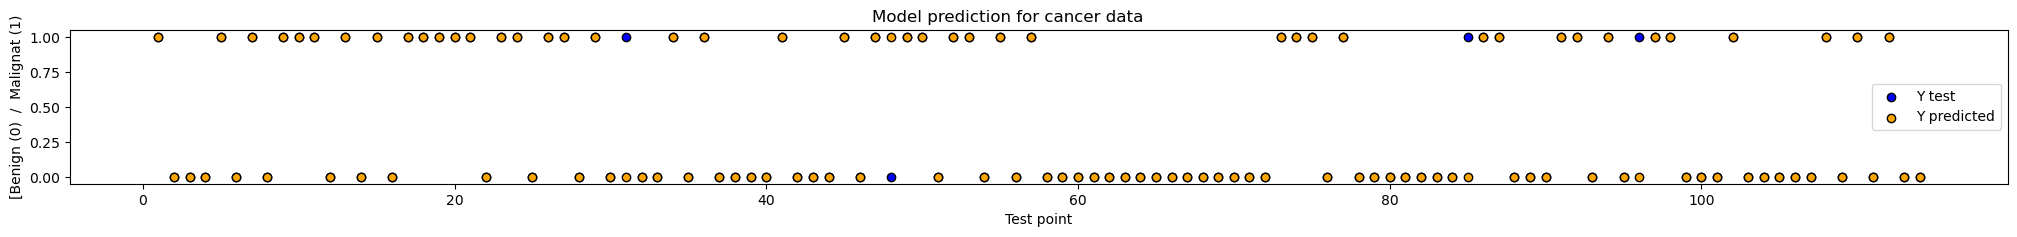

In [74]:
svc = SVC()
# Define the hyperparameters for grid
param_grid = {
    'estimator__C':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],
    'estimator__kernel': ('linear', 'poly', 'rbf', 'sigmoid'),
    'estimator__gamma': ('scale', 'auto'),
    'estimator__degree': [1, 2, 3, 4]
}
y_pred_svc, y_score_svc  = apply_model(svc, param_grid, X_test, y_test)


**The blue points represent the errors in the model.**   
The real labels are the blue points. The orange points represent the predicted labels. I was expecting not the see any blue points. That would have meant that the chosen model was perfect. Although the proportion of blue points is minimal compared with the orange ones.
  
The plot is a graphical representation of the results of the model, it gives us an insight, but on its own do not properly measure the error or the performance of the model applied. That is why in this case **I also perfomed a cross-validation technique in which the score of the best model is printed, in this case is really high 0.9824 which means that the best model applied was a linear one.**  
(See 'Best Parameters' above the plot to see the whole parameters predicted by the grid search).  

The model evaluation is perfom down below in the section 'Model evaluation'

*1.2 Nu-Support Vector Classification*


NuSVC():
    Best Parameters: {'estimator__degree': 1, 'estimator__gamma': 'scale', 'estimator__kernel': 'linear', 'estimator__nu': 0.1}
    Best Score - cross validation: 0.9780219780219781


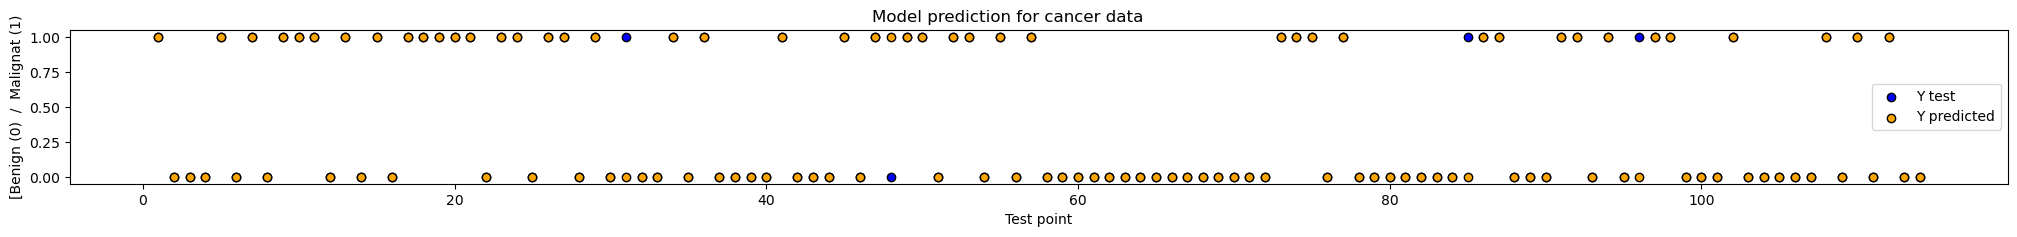

In [75]:
# Nu defines an upper bound on the fraction of margin errors and a lower bound 
# of the fraction of support vectors. 

nu_svc = NuSVC()

# Define the hyperparameters for grid
param_grid = {
    'estimator__nu': [0.1,0.2,0.3,0.4,0.5,0.6,0.7],
    'estimator__kernel': ('linear', 'poly', 'rbf', 'sigmoid'),
    'estimator__gamma': ('scale', 'auto'),
    'estimator__degree': [1, 2, 3, 4]
}
y_pred_nusvc, y_score_nusvc  = apply_model(nu_svc, param_grid, X_test, y_test)


*1.3 Linear Support Vector Classification.*

LinearSVC():
    Best Parameters: {'estimator__C': 0.1, 'estimator__dual': False, 'estimator__loss': 'squared_hinge', 'estimator__penalty': 'l2'}
    Best Score - cross validation: 0.9824175824175825


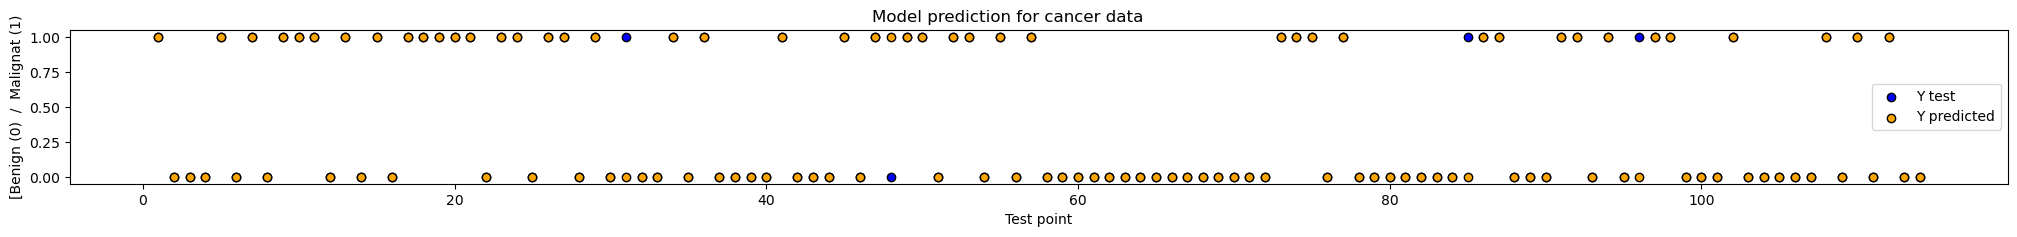

In [76]:

linear_svc = LinearSVC()

# Define the hyperparameters for grid
param_grid = {
    'estimator__penalty': ['l1', 'l2'],
    'estimator__loss': ['squared_hinge'],
    'estimator__dual':[False],
    'estimator__C': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
}
y_pred_lisvc, y_score_lisvc  = apply_model(linear_svc, param_grid, X_test, y_test)


##### 2. Logistic regression

I could not perform all the combinations of the hyperparameters in the gridsearch, as not all the solvers suppor all penalties. But I made the several trials and errors which helpe me defined the hyperparameter combination that got the best cv-scores.  
  
The choice of the algorithm depends on the penalty chosen.

LogisticRegression():
    Best Parameters: {'estimator__C': 0.2, 'estimator__dual': False, 'estimator__penalty': 'l2', 'estimator__solver': 'newton-cg'}
    Best Score - cross validation: 0.9824175824175825


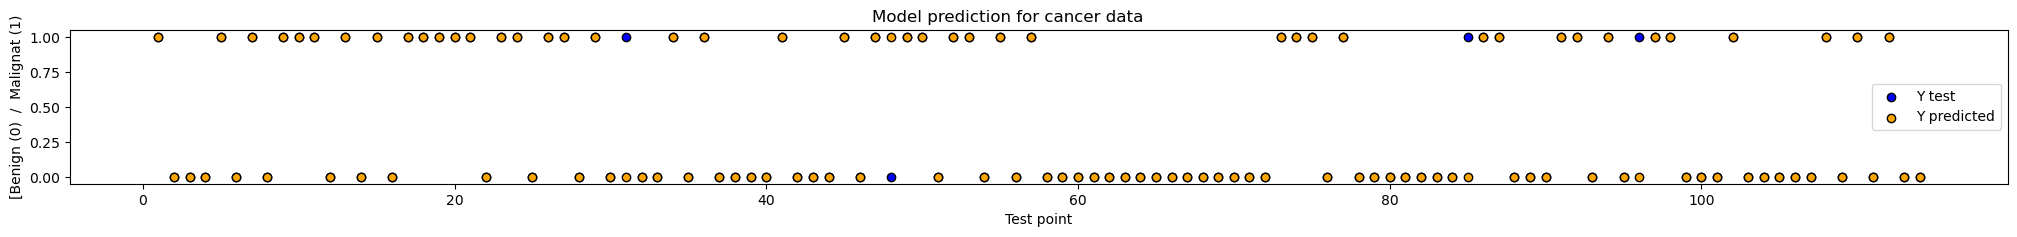

In [77]:
logistic_re = LogisticRegression()

# Define the hyperparameters for grid
param_grid = {
    'estimator__penalty': ['l2'],
    'estimator__solver': ['liblinear', 'newton-cg'], 
    'estimator__dual':[False],
    'estimator__C': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
}
y_pred_logre, y_score_logre  = apply_model(logistic_re, param_grid, X_test, y_test)


#### Analysing the results

The **cross-validation (CV) splitting strategy** was used to evaluate different hyperparameters. It **allows to avoid the overfitting on the test dataset**.  

For example, in the **SVC** and **linearSCV** models the biger the **C parameter** the higher tendency to **overfit the model**, this parameter can be tweaked until the estimator performs optimally.  
With the CV approach the **training set** is split into **k-smaller-sets**, then the model fitting is followed for each of the k “folds” and the best model is returned, along with its score. **In all the models tested I used 5 cross-validation tests.**
  

 Models tested and best CV-score obtained:  

* SVC **(0.9802197802197803)**: C-Support Vector Classification.
* NuSVC **(0.9780219780219781)**: Similar to SVC but uses a parameter (nu) to control the number of support vectors .
* LinearSVC **(0.9824175824175825)**: Faster implementation. Similar to SVC with a linear kernel, scals better to large numbers of samples.
* LogisticRegression **(0.9824175824175825)**: Just like a Linear Regression model, this model computes a weighted sum of the input features (plus a bias term), but instead of outputting the result directly like the Linear Regression model does, it outputs the logistic of this result.


I tried to apply similar hyperparameter options in all the models, to be able to compare the performace on each when predictiong the cancer labels.

Taking into account **just the cross-validation technique**, the 4 models perform quite well, as the four of them have really high CV scores, but the models that **perfomed better** were **LinearSVC** and **LogisticRegression**. I would have expected that SCV had a similar score similar to LinearSVC (as this last one is basically a SVC with linear kernel) as interestingly the best model SCV model was the one with a **linear kernel**. 

Nevertheless, in order to conclude which was the best model for the cancer data set, we have to apply evaluation methods and compare the results (see next section). We also have to take into account the rate of false positives and false positives and the biological relevance of these. 

---------

### **Model Evaluation**

In [84]:
def evaluation_results(y_test, y_pred, y_score):
        
    #M (malignat) to 1 and B (benign) to 0
    target_names = ['Bening', 'Malignant']

    #1.- Classifiaction report 
    print('Classifiaction report - Test data')
    print(classification_report(y_test, y_pred,target_names=target_names))

    # 2.- Confussion matrix
    cm = confusion_matrix(y_test, y_pred)
    cm_display = ConfusionMatrixDisplay(cm, display_labels=target_names)

    #3.- Roc auc 
    # pos label: {negative, positive} --> {0,1}
    # I am more interested in the persons that were predicted to have cancer 
    # rather than the ones that were predicted as benign. So positive label is 1.
    fpr, tpr, thresholds = roc_curve(y_test, y_score, pos_label=1)
    # Calculate the AUC
    roc_auc = auc(fpr, tpr)

    roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                    estimator_name='SVC')

    #4.- Precision recall curve
    prec, recall, _ = precision_recall_curve(y_test, y_score, pos_label=1)
    ap = average_precision_score(y_test, y_score)
    pre_display = PrecisionRecallDisplay(precision=prec, recall=recall,
                                        average_precision=ap,
                                        estimator_name="LinearSVC")


    print(f'Roc auc score (AUC): {roc_auc}') 
    print(f'Mean average precision score (mAP): {ap}')


    ## plotting the results
    fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
    fig.suptitle(f'Model Evaluation')
    cm_display.plot(ax=ax1)
    ax1.set_title('Confusion Matrix')
    roc_display.plot(ax=ax2)
    ax2.set_title('ROC Curve')
    pre_display.plot(ax=ax3)
    ax3.set_title('Precision-Recall Curve')
    plt.show()



Classifiaction report - Test data
              precision    recall  f1-score   support

      Bening       0.96      0.99      0.97        67
   Malignant       0.98      0.94      0.96        47

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

Roc auc score (AUC): 0.9787234042553191
Mean average precision score (mAP): 0.9814055245666189


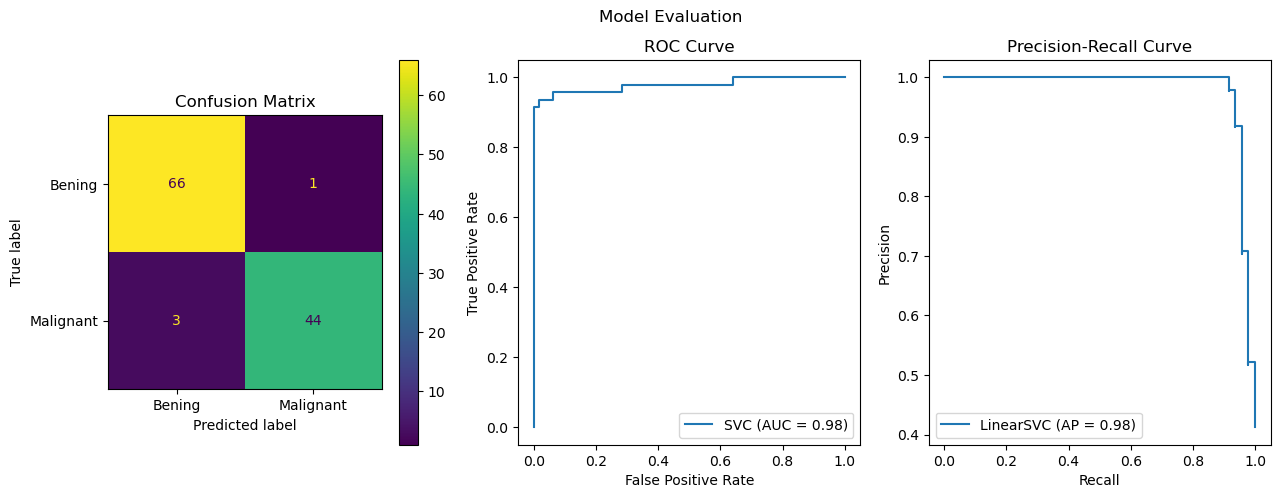

In [85]:
evaluation_results(y_test, y_pred_svc, y_score_svc)

Classifiaction report - Test data
              precision    recall  f1-score   support

      Bening       0.96      0.99      0.97        67
   Malignant       0.98      0.94      0.96        47

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

Roc auc score (AUC): 0.9780882819942839
Mean average precision score (mAP): 0.9809560534280402


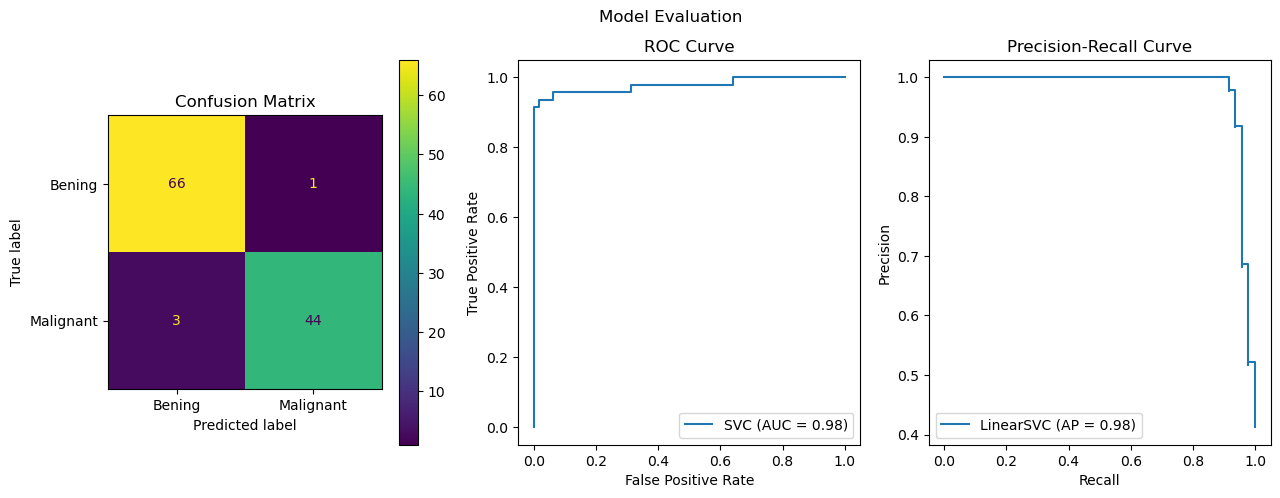

In [86]:
evaluation_results(y_test, y_pred_nusvc, y_score_nusvc)

Classifiaction report - Test data
              precision    recall  f1-score   support

      Bening       0.96      0.99      0.97        67
   Malignant       0.98      0.94      0.96        47

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

Roc auc score (AUC): 0.9812638932994602
Mean average precision score (mAP): 0.9827862994117325


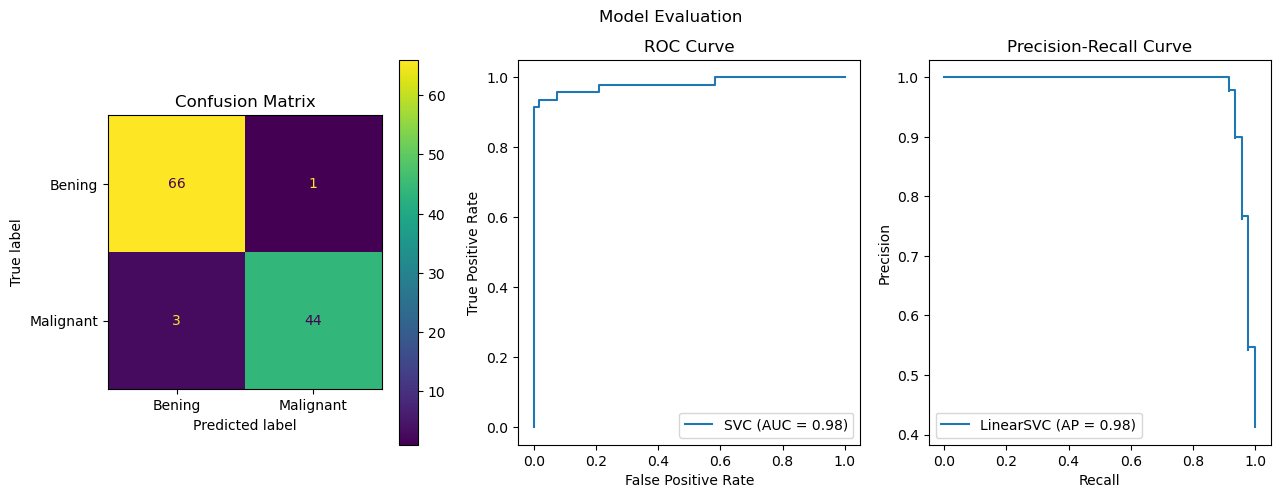

In [87]:
evaluation_results(y_test, y_pred_lisvc, y_score_lisvc)

Classifiaction report - Test data
              precision    recall  f1-score   support

      Bening       0.96      0.99      0.97        67
   Malignant       0.98      0.94      0.96        47

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

Roc auc score (AUC): 0.9812638932994602
Mean average precision score (mAP): 0.9822609587285313


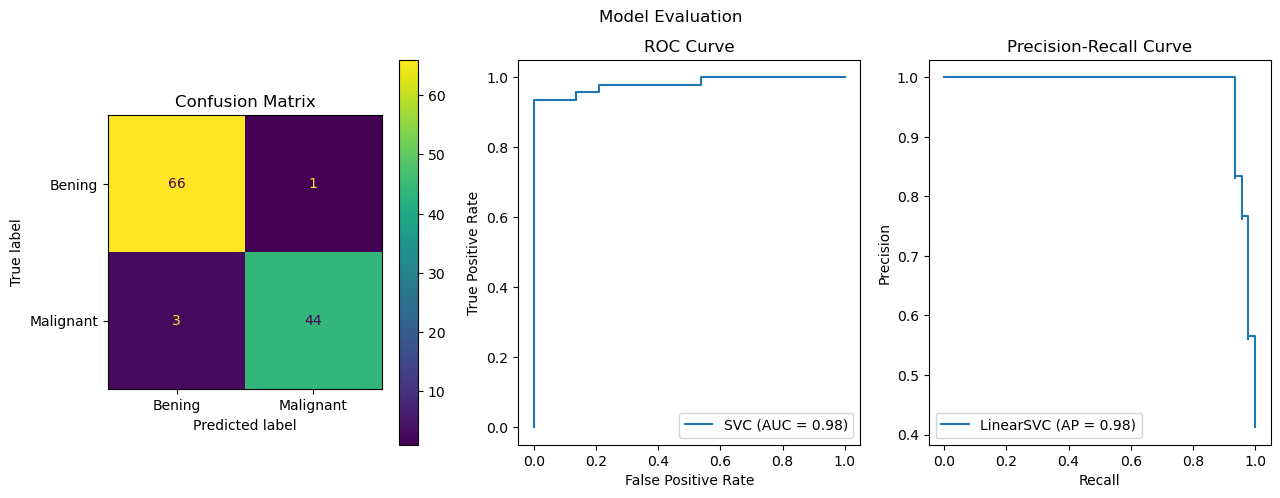

In [88]:
evaluation_results(y_test, y_pred_logre, y_score_logre)

### Analysis of the results  

***Classification report**

* **Precision**: is the accuracy of the positive predictions. In other words, the ability of the classifier not to label as positive a sample that is negative ('how precise the predictions are').  
  
    <span style="color:blue">*(true positives TP)/(true positives TP + False positives FP)*</span>

    <span style="color:#8b0000">The 4 models can identify that patients suffer from cancer 98% of the times.</span>

* **Recall**: is the ratio of positive instances that are correctly detected by the classifier. In other words, the ability of the classifier to find all the positive samples. Also called *sensitivity* or *true positive rate TPR*   

    <span style="color:blue">*(true positives TP)/(true positives TP + False negatives FN)*</span>

    <span style="color:#8b0000">If there are patients who have cancer in the test set the 4 models can identify it 94% of the times.</span>

* **f1-score**: is the combination of the precision and recall into a single metric. It gives much *more weight to low values*. So, a *high F1 score* means that the classifier has *high recall and precision* values. This score favors classifiers that have similar precision and recall. A *lower f1 score* means a *greater imbalance between precision and recall*.   
  
    <span style="color:#8b0000">The 4 models have a f1-score of 96% for the malignant labels. Is a really high parameter for all of them, so there is a harmonic balance in between precision and recall.</span>

* **f1-score accuracy** is the proportion of correct predictions among all the predictions (malignat and bening). 
   
    <span style="color:#8b0000">96% of calssification rate in all the models, which is high.</span>
  
    
<span style="color:#8b0000">**Based just in the classification reports we cannot decide which model perfomed better as all of them give the same results for the parameters mentiones above. So I follow to analyse the other evaluation metrics**</span>


-------



***Types of wrong predictions within this dataset:** 
* <span style="color:blue">False positives FP</span> (top right) -> The algorithm **predicted that someone has cancer**, but they **don't have it**. 
* <span style="color:blue">False negatives FN</span> (botton left) -> Someone **has cancer** but the model **predicted that they don't have it**.
  

In this case **FN are more important**, as could be life-threatening to get more FN rather than more FP in the model. That is, having cancer and being told that you don't. 

***Roc-auc score**: 
* The ROC (receiver operating characteristic) curve is used with binary classifiers. It plots the **sensitivity** (*true positive rate - TPR*) **versus 1 – specificity** (*true negative rate - TNR*).
* AUC measures the **area under the curve**.  
    
The best way to compare classifiers is taking into account these two metrics. A random classifer will have a **ROC-AUC** equal to **0.5**, whereas the closest the **ROC ACU** value gets to **1** the most accurate classifer it is.

***Average Precision score**  
Is the mean of the maximum precisions at different recall values. The higher the recall, the lower the precision.  
So the should be a tradeoff in between these 2 parameters. If you are getting more correct predictions, there is a better PR curve and a higher Average Precision. **The best possible score is 1**, and the **worst is 0**.  

------

Summarising the 4 model results of the evaluation metrics and the CV-score from the fiting step.  
   
**I made red the parameters that were better in the different models.** 
  
   
| Model              |  FP |  FN | Roc- auc         |  mAP              | CV-score        |
| :----------------- | :-: | :-: | :--------------- | :--------------- | :--------------- |
| SVC                |  1  |  3  |0.9787234042553191|0.9814055245666189|0.9802197802197803|
| NuSVC              |  1  |  3  |0.9780882819942839|0.9809560534280402|0.9780219780219781|
| LinearSVC          |  1  |  3  |<span style="color:#8b0000">0.9812638932994602</span>|<span style="color:#8b0000">0.9827862994117325</span>|<span style="color:#8b0000">0.9824175824175825</span>|
| LogisticRegression |  3  |  <span style="color:#8b0000">1</span>  |<span style="color:#8b0000">0.9812638932994602</span>|0.9822609587285313|<span style="color:#8b0000">0.9824175824175825</span>|



--------

### Conclusion
 
Based on all the evaluation metrics and the analysis perfomed <span style="color:#8b0000">the best 2 models are Linear SCV and Logistic regression, but if I take into account the context of the biological data I will choose the LogisticRegression models as it gets the less amount of FN</span>, which is particullarly a really important metric when identifying if a persons has cancer or not. 


### References
* Supervised machine learning presentations (MDSLS) (2023):
    * *'Presentation 4 about SVM.pdf'*

* Several topics:  
*GeÌ ron, A. (2019). Hands-on machine learning with Scikit-Learn, Keras and TensorFlow: concepts, tools, and techniques to build intelligent systems (2nd ed.). O'Reilly.*
* Preprocessing the data: https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing 
* https://scikit-learn.org/stable/tutorial/statistical_inference/putting_together.html 
* cross validation: https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation
* NuSvc: https://scikit-learn.org/stable/modules/generated/sklearn.svm.NuSVC.html#sklearn.svm.NuSVC 
* https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html#sphx-glr-auto-examples-model-selection-plot-precision-recall-py
* https://www.datacamp.com/tutorial/understanding-logistic-regression-python  

